## Internship_Test
## Author : Abin Johnson

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ds = pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\data_2_var.csv')
ds.head()

,A,B
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
ds.tail()

,A,B
1106,-115.366669,121.000000
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1111 non-null   float64
 1   B       1111 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [6]:
ds.describe()

,A,B
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


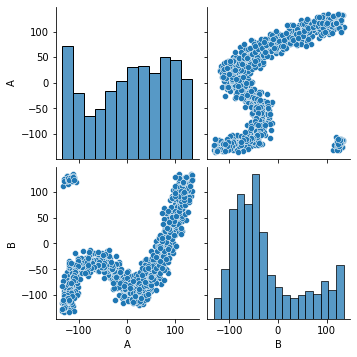

In [7]:
p = sns.pairplot(ds)
p

### Plotting to check linearity

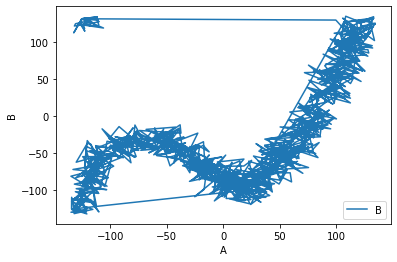

In [10]:
ds.plot(x='A',y='B')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

#### As clearly seen in the figure, it isn't linear at all

### Training and Splitting data (Machine Learning Models)

In [12]:
X = pd.DataFrame(ds['A'])
Y = pd.DataFrame(ds['B'])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(888, 1)
(223, 1)
(888, 1)
(223, 1)


### Performing Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
print(regressor.intercept_)

[-27.61111339]


In [20]:
print(regressor.coef_)

[[0.40298006]]


#### Found the Coefficient and intercept values!

In [24]:
Y_test

,B
663,-88.000000
737,-36.367399
126,-39.000000
354,119.000000
1077,118.532422
...,...
853,-105.711144
274,-48.000000
1082,131.000000
386,-15.031056


In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
Y_pred = regressor.predict(X_train)
Y_pred

array([[-7.77836150e+01],
       [-8.05492615e+01],
       [ 1.40179708e+01],
       [-5.92582251e+01],
       [-7.15579359e+01],
       [-3.13856941e+01],
       [-1.81639968e+01],
       [-3.90079776e+01],
       [ 7.11909164e+00],
       [-6.80391041e+00],
       [-5.11355035e+01],
       [-7.20776344e+01],
       [-7.32740380e+01],
       [-1.24217566e+01],
       [-6.05629277e+01],
       [ 6.49443159e+00],
       [-7.49075407e+01],
       [-2.89678137e+01],
       [-7.52465062e+01],
       [-2.25201328e+01],
       [-4.02512554e+01],
       [ 2.63508874e+01],
       [-7.62129069e+01],
       [ 1.49862531e+01],
       [ 2.15586800e+01],
       [-9.05053131e+00],
       [ 1.69719132e+01],
       [-7.08777401e+01],
       [-3.59958329e+01],
       [-2.52831419e+01],
       [ 1.85838334e+01],
       [-3.15729769e+01],
       [-7.42722654e+01],
       [-5.91250063e+01],
       [-7.00536499e+01],
       [-8.19799819e+01],
       [-1.73080521e+01],
       [-7.81313811e+01],
       [-8.0

In [34]:
residuals = Y_train.values-Y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 2.880578658486893e-16


##### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. The Output is coming to be very closer to zero, so everything seems fine here!

### Checking Normality Assumptions

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


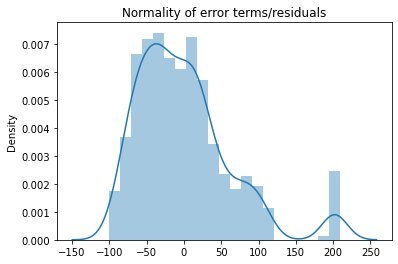

In [36]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [ ]:
### Thank You